# 9. Support Vector Machines – Labs

Lab excercises from **Chapter 9** of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [337]:
import itertools

import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV


## 9.6.1 Support Vector Classifier

In [208]:
# Generate som sample data with 2 predictors and a response
np.random.seed(2)
X = np.random.normal(0, 1, (20, 2))
y = np.concatenate((np.repeat(0, 10), np.repeat(1, 10)))
X[y==1, :] = X[y==1, :] +1



,x1,x2,y
0,-0.416758,-0.056267,0
1,-2.136196,1.640271,0
2,-1.793436,-0.841747,0
3,0.502881,-1.245288,0
4,-1.057952,-0.909008,0
5,0.551454,2.292208,0
6,0.041539,-1.117925,0
7,0.539058,-0.596160,0
8,-0.019130,1.175001,0
9,-0.747871,0.009025,0


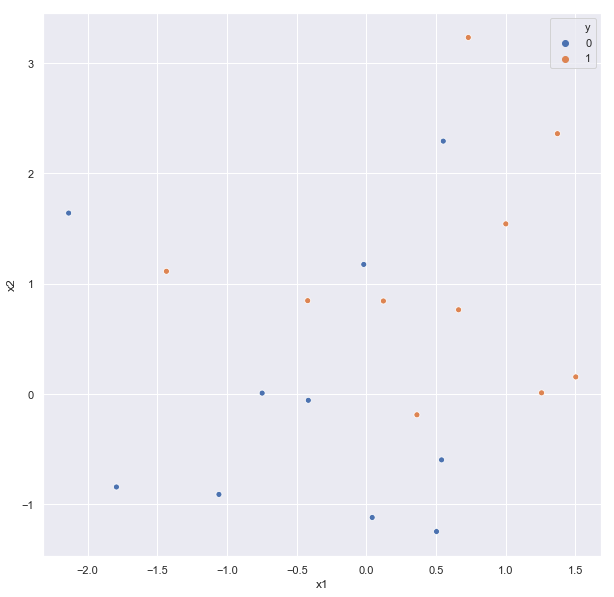

In [209]:
# Plot it, is it linearly seperable?
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
display(df)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);


In [210]:
model = svm.SVC(kernel='linear', C=10, random_state=0).fit(X, y)

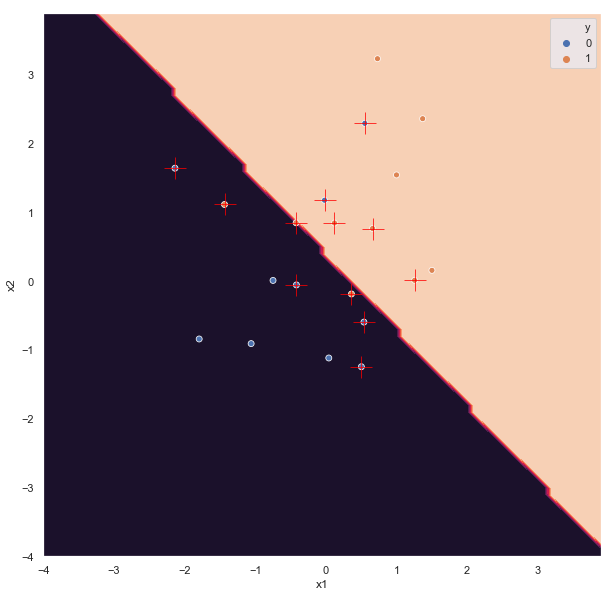

In [211]:
# Decistion boundary plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

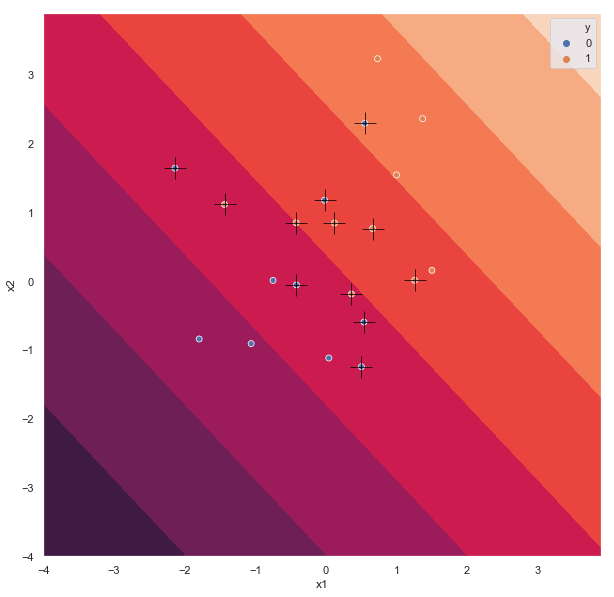

In [212]:
# Contour plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.decision_function(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df);
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='black', marker='+', s=500)


### We can obtain some basic information about the support vector classifier

In [213]:
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)



Model parameters:
<bound method BaseEstimator.get_params of SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[6 6]

Coefficients of the support vector in the decision function. :
[[-10.          -5.05497878  -7.40089843 -10.         -10.
  -10.          10.          10.           2.45587721  10.
   10.          10.        ]]

Weights assigned to the features (coefficients in the primal problem).
[[1.00241093 0.91678573]]


### What if we instead use a smaller value of the cost parameter?


Model parameters:
<bound method BaseEstimator.get_params of SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[8 8]

Coefficients of the support vector in the decision function. :
[[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1
   0.1  0.1]]

Weights assigned to the features (coefficients in the primal problem).
[[0.473289   0.29874954]]


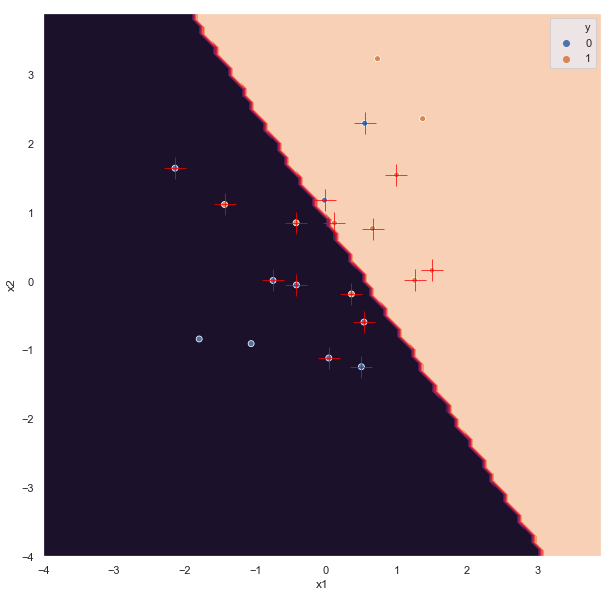

In [214]:
model = svm.SVC(kernel='linear', C=0.1, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)


With lower cost parameter the model uses more support vectors because the margin is now wider

### Use cross-validation to tune Cost parameter

In [215]:
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 100]
scores = []
for C in Cs:
    model = svm.SVC(kernel='linear', C=C, random_state=0)
    score = cross_val_score(model, X, y, cv=5)
    scores += [score]
    
scores_mean = np.mean(np.asarray(scores), axis=1)

pd.DataFrame({'C': Cs, 'accuracy': scores_mean})

,C,accuracy
0,0.001,0.60
1,0.010,0.60
2,0.100,0.60
3,1.000,0.70
4,5.000,0.75
5,10.000,0.75
6,100.000,0.75


Text(0.5,0,'log(C)')

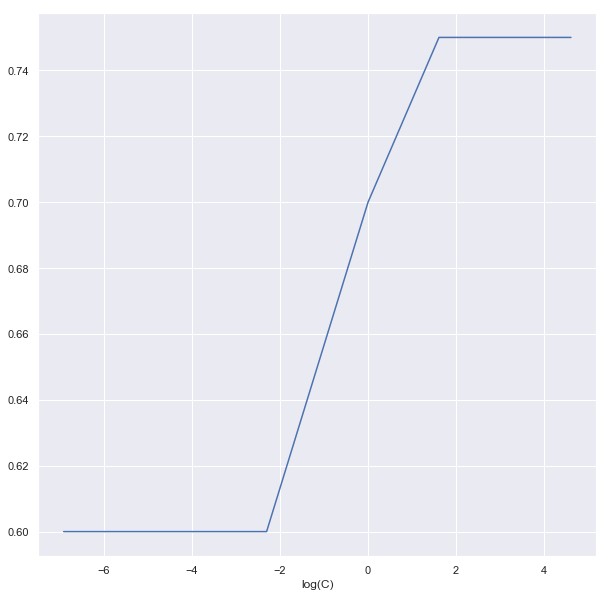

In [216]:
plt.figure(figsize=(10,10))
sns.lineplot(x=np.log(Cs), y=scores_mean)
plt.xlabel('log(C)')
# plt.ylabel('accuracy');

In [217]:
# Generate simulated test set
xtest = np.random.normal(0, 1, (20, 2))
ytest = np.random.choice([0, 1], size=20, replace=True)
xtest[ytest==1, :] = xtest[ytest==1, :] +1

In [218]:
# With cost = 5
# Test model selected by cross-validation
model = svm.SVC(kernel='linear', C=5, random_state=0).fit(X, y)
ypred = model.predict(xtest)

confusion_matrix(ytest, ypred)

array([[ 6,  4],
       [ 0, 10]])

In [219]:
# With cost = 0.01
# Test model selected by cross-validation
model = svm.SVC(kernel='linear', C=0.01, random_state=0).fit(X, y)
ypred = model.predict(xtest)

confusion_matrix(ytest, ypred)

array([[7, 3],
       [2, 8]])

### Now consider a situation in which two classes are linearly seperable

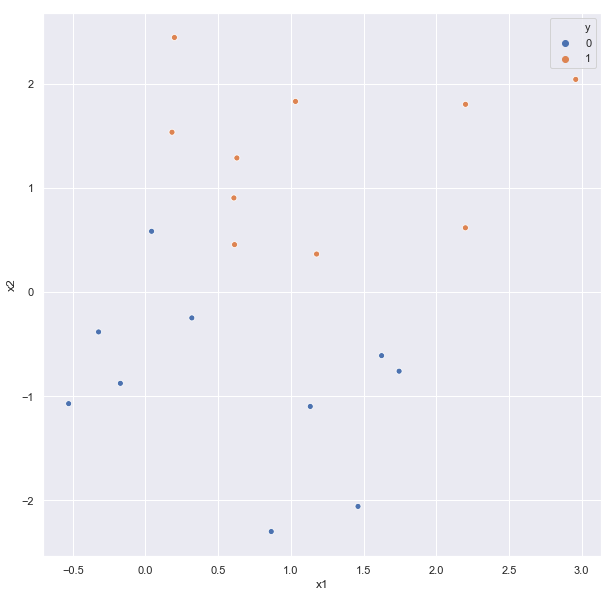

In [231]:
# Generate set that is linearly seperable
np.random.seed(1)
X = np.random.normal(0, 1, (20, 2))
y = np.concatenate((np.repeat(0, 10), np.repeat(1, 10)))
X[y==1, :] = X[y==1, :] + 1.3

df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[2 1]

Coefficients of the support vector in the decision function. :
[[ -9.19595849 -25.03717651  34.233135  ]]

Weights assigned to the features (coefficients in the primal problem).
[[4.98467412 6.60267588]]


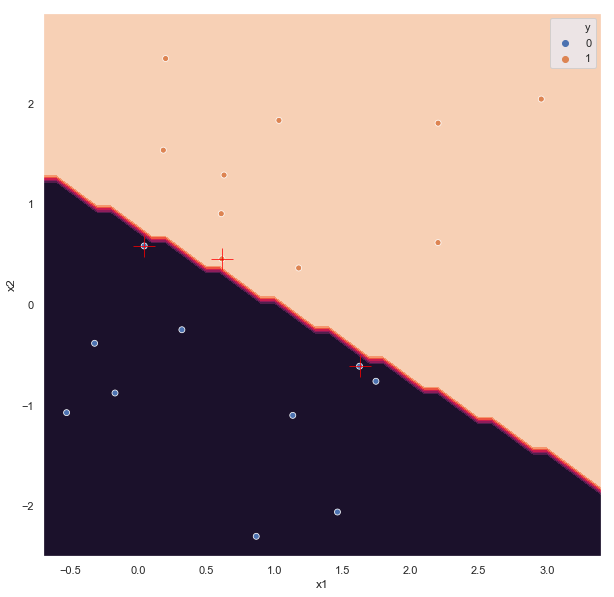

In [239]:
model = svm.SVC(kernel='linear', C=1e5, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-.7, 3.5, .1)
x2 = np.arange(-2.5, 3, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)

No training errors, only three support vectors used. We can see that margin is very narrorw because the support vectors are very close to the the decision boundary. 

### Now with a smaller value of cost

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[3 3]

Coefficients of the support vector in the decision function. :
[[-0.90534066 -0.79575232 -1.          1.          0.70109298  1.        ]]

Weights assigned to the features (coefficients in the primal problem).
[[0.4497637  1.62175449]]


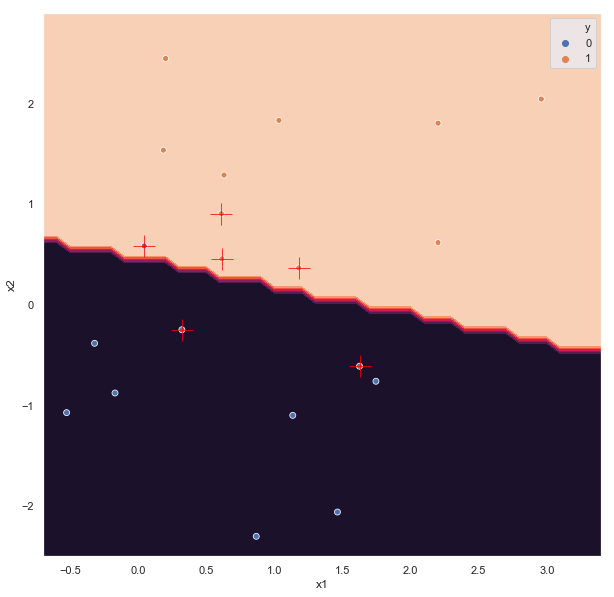

In [241]:
model = svm.SVC(kernel='linear', C=1, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-.7, 3.5, .1)
x2 = np.arange(-2.5, 3, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)

Using cost 1 we misclassify a training observation but there is a wider margin and so are more support vectors. It seems likely this model will be less affected by overfitting than when cost=1e5.

## 9.6.2 Support Vector Machine

In [245]:
# Geenrate data with a non-linear class boundary
np.random.seed(1)
X = np.random.normal(0, 1, (200, 2))
X[1:100,]   = X[1:100,] + 2
X[101:150,] = X[101:150,] - 2
y = np.concatenate((np.repeat(0, 150), np.repeat(1, 50)))

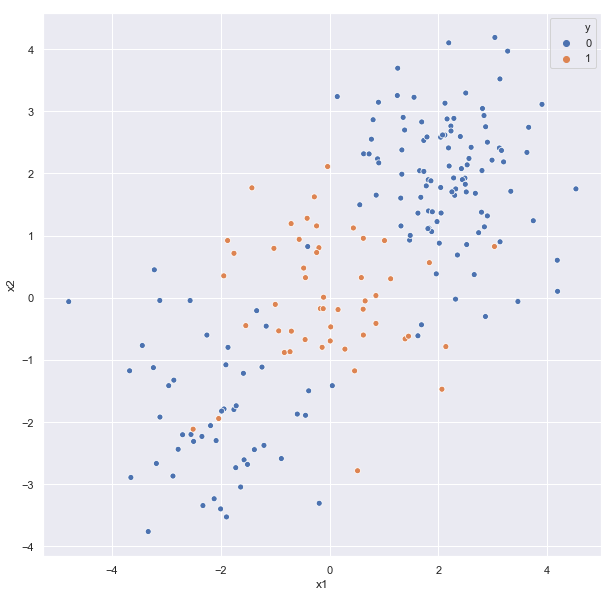

In [247]:
# Plot data
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

In [255]:
# Index a training set
train = np.random.random(len(y)) > 0.5

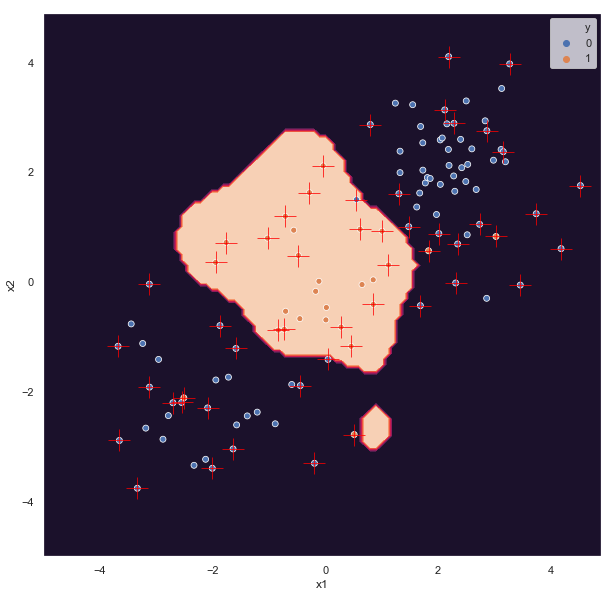

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[34 19]

Coefficients of the support vector in the decision function. :
[[-0.37132271 -0.48342346 -0.33497995 -0.29851476 -0.0850208  -0.17263003
  -1.         -0.17777894 -0.01244395 -0.6090602  -0.16824076 -0.31539116
  -0.57799269 -0.08416399 -1.         -0.74614472 -1.         -0.25458311
  -0.179926   -0.29396624 -0.210785   -0.56730368 -0.71857197 -0.97968356
  -0.06553295 -0.2440551  -0.29817169 -0.79069468 -0.02047509 -1.
  -0.693316   -0.12147924 -0.00789739 -0.77974867  1.          0.57788719
   0.73784018  1.          1.          0.32380479  1.          0.38521508
   1.          1.          1.          1.          1.          0.74624735
   1.          0.5799908

In [279]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0).fit(X[train], y[train])

# Decision boundary plot

x1 = np.arange(-5, 5, .1)
x2 = np.arange(-5, 5, .1)
xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df[train])
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
plt.show();

# Get summary of model
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nTraining accuracy:')
print(model.score(X[train], y[train]))

We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

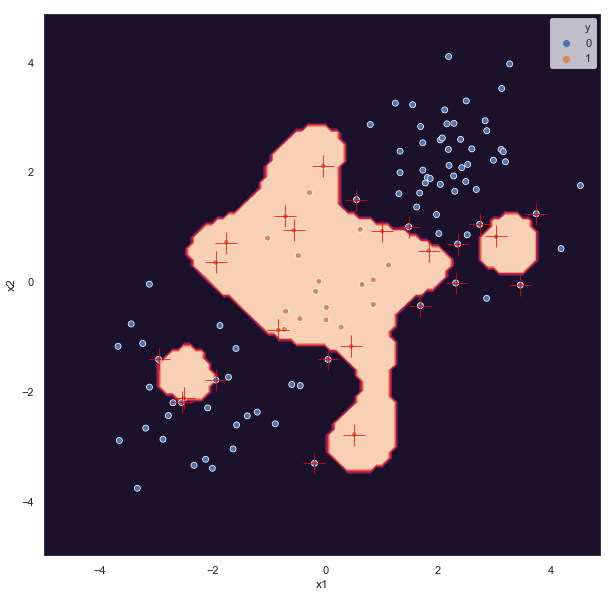

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[13 12]

Coefficients of the support vector in the decision function. :
[[-2.94408546e+00 -1.28564417e+00 -3.46014897e+00 -1.10607541e+00
  -4.38574425e+00 -1.07806443e+01 -2.95485465e+00 -1.25758441e+01
  -2.56721287e+02 -4.33636718e-01 -7.63309008e+00 -3.08082873e+01
  -1.50760502e+01  6.67359160e+00  1.30223908e+01  8.84018653e-01
   2.84972061e+02  7.89188937e+00  8.98519034e+00  9.71729935e-01
   2.50255629e+00  3.47333278e+00  1.68532851e+01  1.78243944e-01
   3.75710246e+00]]

Training accuracy:
1.0


In [278]:
model = svm.SVC(kernel='rbf', gamma=1, C=1e5, random_state=0).fit(X[train], y[train])

# Decision boundary plot

x1 = np.arange(-5, 5, .1)
x2 = np.arange(-5, 5, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df[train])
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
plt.show();

# Get summary of model
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nTraining accuracy:')
print(model.score(X[train], y[train]))

### Hyper-parameter tuning

In [310]:
# Train Classifiers
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
# ----------------------------------------------------------------

C_range     = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-3, 9, 13) 
param_grid  = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5)
grid.fit(X[train], y[train])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [311]:
print(f"The best parameters are {grid.best_params_}, with a score of {grid.best_score_:.3f}")

The best parameters are {'C': 1.0, 'gamma': 1.0}, with a score of 0.929


Therefore, the best choice of parameters found involves cost=1 and gamma=1. We can view the test set predictions for this model by applying the predict() function to the data.

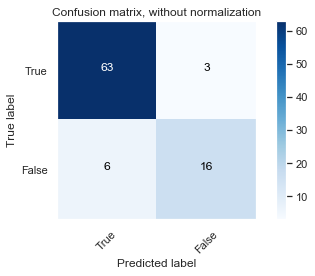

In [333]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Stolen from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.title("Normalized confusion matrix")
    else:
        plt.title('Confusion matrix, without normalization')
        
    #plt.title(title)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show();

cm = confusion_matrix(y[~train], grid.predict(X[~train]))
plot_confusion_matrix(cm, ['True', 'False'], normalize=False)



In [336]:
print(f"{(9 / len(y[~train]))*100:.2f}% of test observations are misclassified by this SVM.")

10.23% of test observations are misclassified by this SVM.


## 9.6.3 ROC Curves

#### A single ROC curve

In [363]:

# Fit optimal model chosen by grid search 
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])
# Get probability of positive binary classification
probs = model.predict_proba(X[~train])
preds = probs[:, 1]
# Get ROC metrics
# False Postitive Rate, True Positive Rate metrics by threshold
fpr, tpr, threshold = metrics.roc_curve(y[~train], preds)
# Get area under curve metrics
auc = metrics.auc(fpr, tpr)

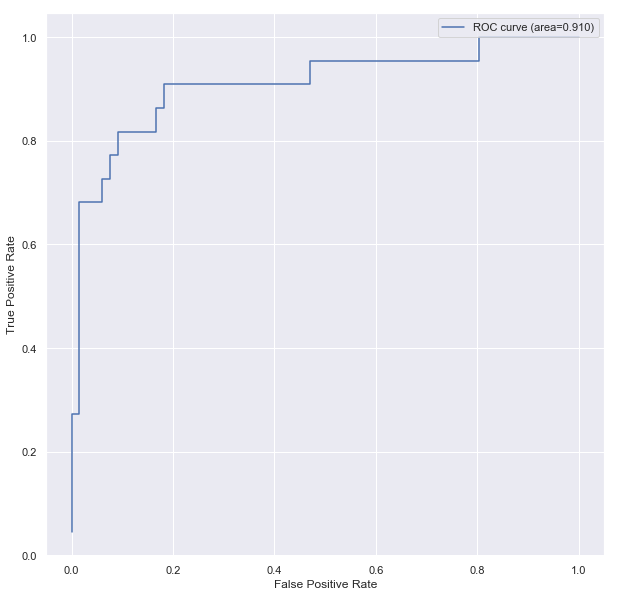

In [364]:
# Plot ROC curve using seaborn
plot_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

plt.figure(figsize=(10,10))
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=plot_df, 
             estimator=None, 
             label=f'ROC curve (area={auc:.3f})');
        

#### ROC comparison

In [501]:
results = np.empty((0, 3))
for g in np.logspace(-5, 4, base=2, num=4):
    # Fit optimal model chosen by grid search 
    model = svm.SVC(kernel='rbf', gamma=g, C=1, random_state=0, probability=True).fit(X[train], y[train])
    # Get probability of positive binary classification
    probs = model.predict_proba(X[~train])
    preds = probs[:, 1]
    # Get ROC metrics
    # False Postitive Rate, True Positive Rate metrics by threshold
    fpr, tpr, threshold = metrics.roc_curve(y[~train], preds)
    # Get area under curve metrics
    auc = metrics.auc(fpr, tpr)
    r = np.array([np.repeat(g, len(fpr)), fpr, tpr]).T
    results = np.concatenate((results, r), axis=0)



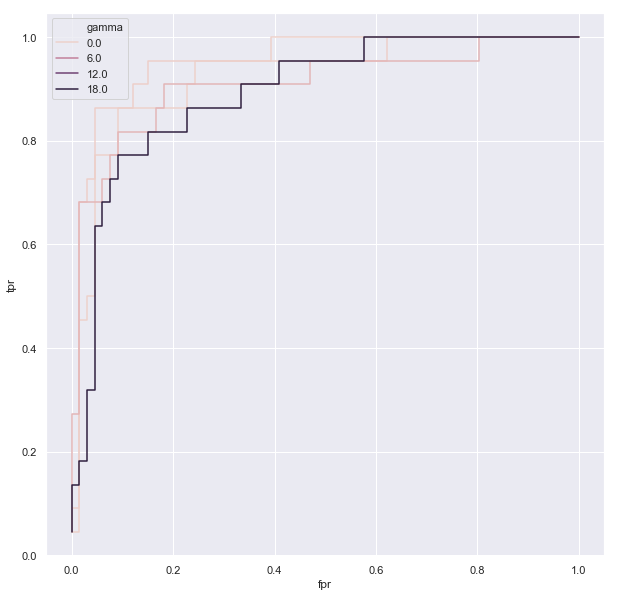

In [502]:
plot_df = pd.DataFrame(results, columns=['gamma', 'fpr', 'tpr'])
plt.figure(figsize=(10,10))
sns.lineplot(x='fpr', y='tpr', hue='gamma', data=plot_df, estimator=None)

### 9.6.4 SVM with Multiple Classes

In [539]:
# Generate multi-class data with 3 response classes 0, 1 and 2
np.random.seed(0)
X = np.random.normal(0, 1, (300, 2))
X[1:100,]   = X[1:100,]
X[101:200, :1] = X[101:200, :1] + 4
X[201:300, 1:] = X[201:300, 1:] + 4
X[201:300, :1] = X[201:300, :1] + 2
y = np.concatenate((np.repeat(0, 100), np.repeat(1, 100), np.repeat(2, 100)))

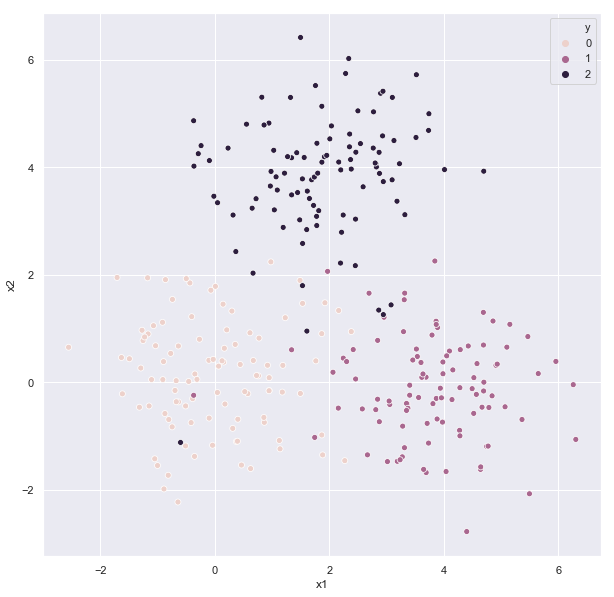

In [540]:
# Plot data
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

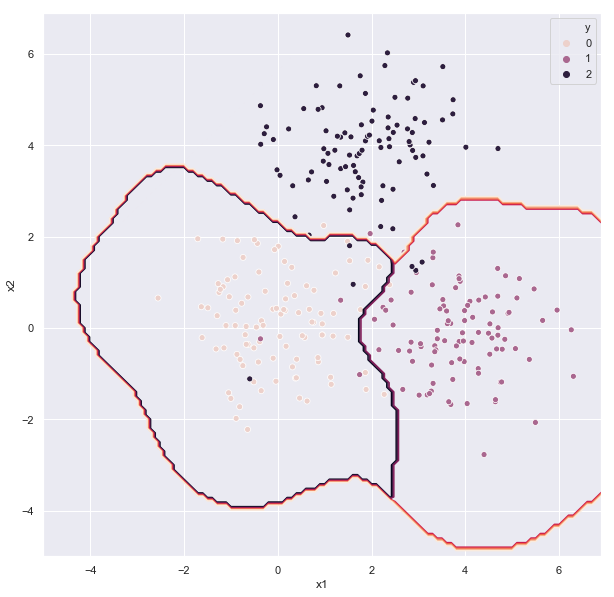

In [570]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X, y)

# Decision boundary plot

x1 = np.arange(-5, 7, .1)
x2 = np.arange(-5, 7, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))

fig = plt.figure(figsize=(10, 10))
plt.contour(x1, x2, y_grid);

sns.scatterplot(x='x1', y='x2', hue='y', data=df)
#sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
plt.show();

## 9.6.5 Application to Gene Expression Data

In [584]:
khan_train_df = pd.read_csv('./data/khan_train.csv', index_col=0)
khan_test_df  = pd.read_csv('./data/khan_test.csv', index_col=0)
display(khan_train_df.head())
display(khan_test_df.head())

,EWS.T1,EWS.T2,EWS.T3,EWS.T4,EWS.T6,EWS.T7,EWS.T9,EWS.T11,EWS.T12,EWS.T13,...,RMS.T4,RMS.T2,RMS.T6,RMS.T7,RMS.T8,RMS.T5,RMS.T9,RMS.T3,RMS.T10,RMS.T11
1,3.2025,1.6547,3.2779,1.0060,2.7098,2.0588,1.8483,2.7140,2.3555,1.9291,...,3.4636,2.0816,3.1013,2.0272,2.2313,1.8594,2.5447,1.2705,1.2766,2.0298
2,0.0681,0.0710,0.1160,0.1906,0.2367,0.0823,0.1234,0.1805,0.0792,0.2520,...,1.2855,0.9137,0.3910,0.5502,1.9247,0.5240,0.5169,0.4657,0.7770,0.7067
3,1.0460,1.0409,0.8926,0.4302,0.3693,0.9021,0.9983,0.4964,0.7614,0.5745,...,0.3355,0.5806,0.3937,0.3688,0.2943,0.6808,1.2190,0.9344,0.2212,1.0439
4,0.1243,0.0520,0.1014,0.1035,0.2190,0.1288,0.2203,0.2509,0.1868,0.1356,...,0.0893,0.0673,0.2905,0.3627,0.1762,0.3013,0.5151,0.0680,0.1432,0.1016
5,0.4941,0.2045,0.2818,0.2984,0.3711,0.3961,0.3766,0.4754,0.4167,0.3363,...,0.3219,0.6856,0.1113,0.6133,0.3855,0.4011,0.3405,0.3930,0.1669,0.2147


,TEST.9,TEST.11,TEST.5,TEST.8,TEST.10,TEST.13,TEST.3,TEST.1,TEST.2,TEST.4,...,TEST.20,TEST.17,TEST.18,TEST.22,TEST.16,TEST.23,TEST.14,TEST.25,TEST.15,TEST.19
1,1.7733,0.1397,1.9420,0.7721,0.3296,0.7509,1.4407,1.1497,3.2036,2.3189,...,3.0381,3.7487,0.1860,0.7623,0.8264,0.6403,0.6729,0.8249,0.1181,0.7173
2,0.4875,0.0846,0.2103,0.1855,0.3510,0.4165,0.3036,0.3107,0.1329,1.2901,...,0.1378,1.6411,0.0872,0.3245,0.2202,0.2515,0.3038,0.3454,0.1068,0.1108
3,0.5832,2.3266,2.4897,1.1922,0.4258,1.2165,2.9190,1.7594,3.0148,0.8116,...,1.2505,1.0424,1.9834,0.2148,2.2806,1.3489,2.0071,1.2253,0.3881,0.6291
4,0.3514,0.1188,0.1770,0.0979,0.0737,0.1280,1.1618,0.0345,0.1147,0.1167,...,0.2309,0.2140,0.1222,0.0707,0.0915,0.0646,0.1553,0.1277,0.0622,0.0742
5,0.7182,0.3497,0.5963,0.1841,0.1702,0.2474,0.1502,0.2663,0.2369,0.2203,...,0.3002,0.1965,0.1836,0.3171,0.3287,0.2302,0.2691,0.2764,0.1616,0.2998


Hmm, I can't locate the response vectors...